In [176]:
import torch
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as F
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Pooling

In neural networks, the pooling method is used in order to reduce the dimensionality of an image.
Pooling layers reduce the height and width of input images. Indeed, pooling analyzes
regions of the size of the filter and keeps only a statistic on this region (maximum, minimum,
mean)

<p align="center">
    <img src = "img/max_pooling.png" />
</p>

**Question 1.** 
Retrieve 16 images from the MNIST dataset. This dataset can be manipulated from
equivalent to the FashionMIST dataset. There is no need to normalize.

In [19]:
train_mnist = torchvision\
    .datasets\
    .MNIST(
        train= True,
        download= True,
        root='.',
        transform=transforms.ToTensor()
    )

In [20]:
imgs = train_mnist.data[:16]

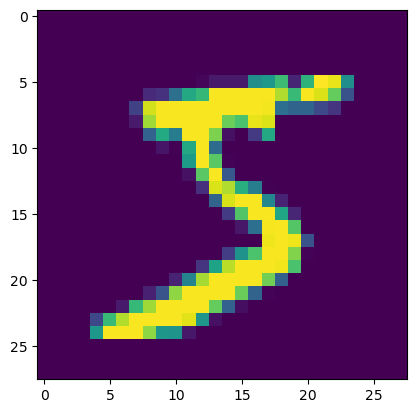

In [ ]:
plt.imshow(imgs[0])

In [17]:
imgs[0].shape

torch.Size([28, 28])

**Question 2.** Apply the methods of max pooling, average pooling and min pooling on
these images. Use the functions `torch.nn.MaxPool2d()` and `torch.nn.AvgPool2d()` with a
3x3 size filter. Attention, these layers take as first dimension the
input (and therefore output) tensor the size of the batch, you can use the method
`view` to change the apparent dimension of a tensor. As there is no diaper
pre-implemented for minpooling in pytorch, you'll need to find a trick to get there
achieve with torch.nn.MaxPool2d.

In [158]:
max_pool = torch.nn.MaxPool2d(3)
avg_pool = torch.nn.AvgPool2d(3)

In [159]:
imgs.shape

torch.Size([16, 28, 28])

In [160]:
imgs.shape

torch.Size([16, 28, 28])

In [171]:
max_pool_imgs = torch.tensor([])
avg_pool_imgs = torch.tensor([])
min_pool_imgs = torch.tensor([])

for img in imgs:
    max_pool_imgs = torch.cat(
        [max_pool_imgs, max_pool(img.view(1,28,28).float())],
        dim=0
    )

    avg_pool_imgs = torch.cat(
        [avg_pool_imgs, avg_pool(img.view(1,28,28).float())],
        dim=0
    )
    min_pool_imgs = torch.cat(
        [min_pool_imgs, -max_pool(-img.view(1,28,28).float())]
    )

In [172]:
max_pool_imgs.shape

torch.Size([16, 9, 9])

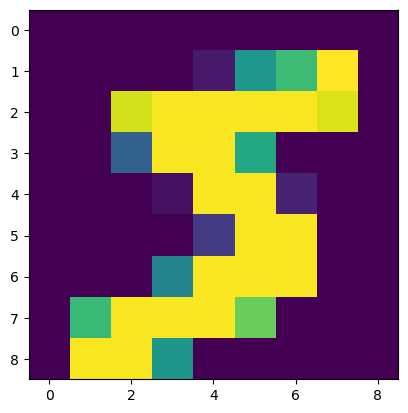

In [173]:
plt.imshow(max_pool_imgs[0])

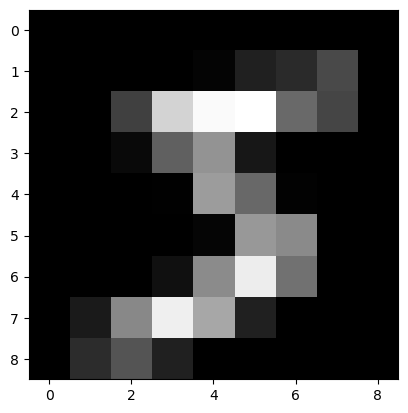

In [219]:
plt.imshow(avg_pool_imgs[0] , )

**Question 3.** Using matplotlib display 16 original images, after images max
pooling, images after average pooling and images after min pooling. To display
multiple images at the same time, you can first use
torchvision.utils.make_grid to concatenate a batch of images into a grid
pictures.

In [238]:
axs

NameError: name 'axs' is not defined

In [228]:
len(list(min_pool_imgs))

16

In [235]:
max_pool_imgs[0].int().shape

torch.Size([9, 9])

In [272]:
def show (imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=2,nrows=len(imgs)//2, )
    fig.set_figheight(10)
    fig.set_figwidth(10)
    for i, img in enumerate(imgs):
        # img = img.detach()
        # img = F.to_pil_image(img)
        
        axs[i //2, i%2].imshow(img)
        axs[i//2, i%2].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        

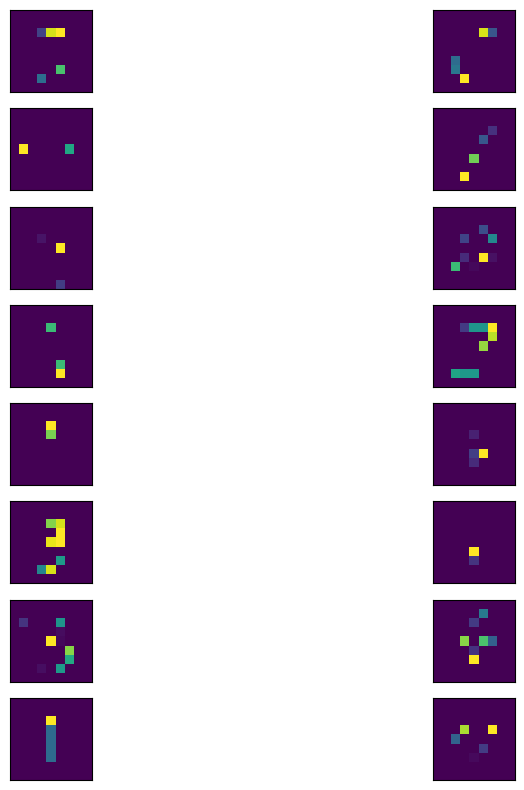

In [273]:

show(list(min_pool_imgs))


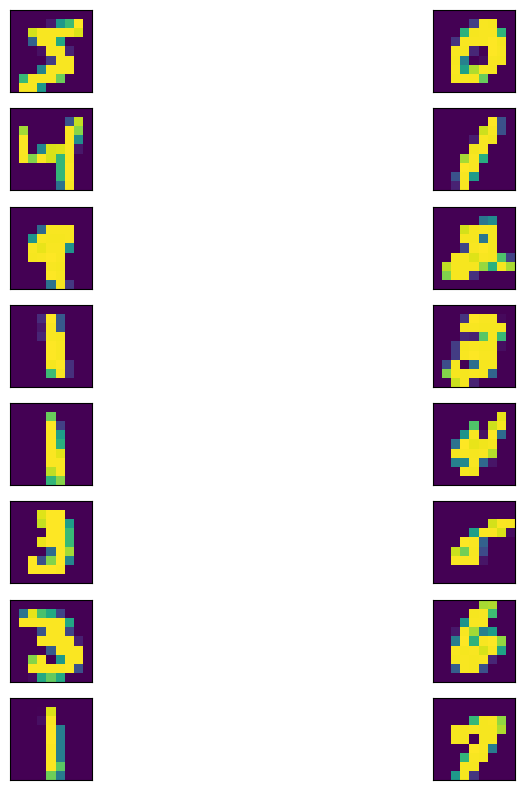

In [275]:
show(list(max_pool_imgs))

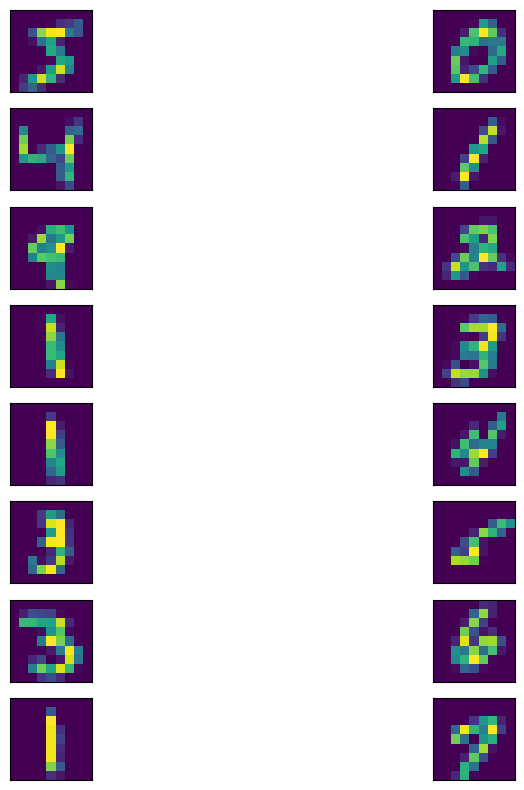

In [276]:
show(list(avg_pool_imgs))